<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Factorial Design in Mineral Hardness Experiment
</h1>


# Planning the experiment


In [6]:
import pandas as pd
import numpy as np
# !pip install pyDOE2
from pyDOE2 import ff2n  # Full factorial design
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
url = "https://raw.githubusercontent.com/carsimoes/Experimental-Mineral-Analysis/main/Notebook/Data/Minerals_Database.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Columns: 140 entries, Unnamed: 0 to Calculated Density
dtypes: float64(138), int64(1), object(1)
memory usage: 3.3+ MB
None


In [8]:
df

,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,0,Abenakiite-(Ce),5.0,4.50,0.0,3.240,3.0,1.580,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,1,Abernathyite,4.0,2.75,3.0,3.446,3.0,1.592,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,2,Abhurite,5.0,2.00,3.0,4.420,3.0,2.085,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
3,3,Abswurmbachite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,550.019900,0.033658,13.563
4,4,Actinolite,2.0,5.50,2.0,1.050,4.0,1.634,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3107,Zoltaiite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,677.090039,0.067308,8.349
3108,3108,Zugshunstite-(Ce),0.0,0.00,0.0,0.000,0.0,0.000,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1005.674169,0.280205,2.979
3109,3109,Zvyaginite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,38.0,1037.626464,0.179472,4.799
3110,3110,Zwieselite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,225.663765,0.056017,3.344


In [9]:
# Show the first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Unnamed: 0             Name  Crystal Structure  Mohs Hardness  Diaphaneity  \
0           0  Abenakiite-(Ce)                5.0           4.50          0.0   
1           1     Abernathyite                4.0           2.75          3.0   
2           2         Abhurite                5.0           2.00          3.0   
3           3   Abswurmbachite                0.0           0.00          0.0   
4           4       Actinolite                2.0           5.50          2.0   

   Specific Gravity  Optical  Refractive Index  Dispersion  Hydrogen  ...  \
0             3.240      3.0             1.580         0.0       0.0  ...   
1             3.446      3.0             1.592         0.0       1.0  ...   
2             4.420      3.0             2.085         0.0       3.0  ...   
3             0.000      0.0             0.000         0.0       0.0  ...   
4             1.050      4.0             1.634         0.0       1.0  ...   

   Acetate  Phosphate  Sulphate  Ca

In [10]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Unnamed: 0  Crystal Structure  Mohs Hardness  Diaphaneity  \
count  3112.000000        3112.000000    3112.000000  3112.000000   
mean   1555.500000           0.677057       0.845925     0.405206   
std     898.501345           1.388575       1.844267     0.877966   
min       0.000000           0.000000       0.000000     0.000000   
25%     777.750000           0.000000       0.000000     0.000000   
50%    1555.500000           0.000000       0.000000     0.000000   
75%    2333.250000           0.000000       0.000000     0.000000   
max    3111.000000           6.000000       9.500000     3.000000   

       Specific Gravity      Optical  Refractive Index   Dispersion  \
count       3112.000000  3112.000000       3112.000000  3112.000000   
mean           0.666800     0.701157          0.323626     0.000459   
std            1.481692     1.456768          0.678769     0.006851   
min            0.000000     0.000000          0.000000     0.000000   
25

In [11]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0            0
Name                  0
Crystal Structure     0
Mohs Hardness         0
Diaphaneity           0
                     ..
Hydrated Water        0
count                 0
Molar Mass            0
Molar Volume          0
Calculated Density    0
Length: 140, dtype: int64


In [ ]:
df.columns = df.columns.str.replace(" ", "_")
# factor_2 = "Specific_Gravity"

In [13]:
# Define factors (Crystal Structure & Specific Gravity)
factor_1 = "Crystal_Structure"  # Example factor 1
factor_2 = "Specific_Gravity"  # Example factor 2
response_var = "Optical"  # Example response variable

In [17]:
# Create a two-level factorial design (coded as -1 and +1)
factorial_design = ff2n(2)  # 2 factors, 2 levels each

# Define high (+1) and low (-1) levels for each factor
low_high = {
    factor_1: [df[factor_1].min(), df[factor_1].max()],
    factor_2: [df[factor_2].min(), df[factor_2].max()]
}


In [18]:
# Map coded values to actual data ranges
design_df = pd.DataFrame(factorial_design, columns=[factor_1, factor_2])
design_df[factor_1] = design_df[factor_1].map({-1: low_high[factor_1][0], 1: low_high[factor_1][1]})
design_df[factor_2] = design_df[factor_2].map({-1: low_high[factor_2][0], 1: low_high[factor_2][1]})

In [ ]:
design_df

,Crystal_Structure,Specific_Gravity
0,0.0,0.000
1,6.0,0.000
2,0.0,9.593
3,6.0,9.593


In [ ]:
# Merge with response variable (Optical Values)
design_df[response_var] = np.random.uniform(df[response_var].min(), df[response_var].max(), len(design_df))

In [ ]:
# Fit factorial model
formula = f"{response_var} ~ {factor_1} + {factor_2} + {factor_1}:{factor_2}"
model = smf.ols(formula, data=design_df).fit()

In [ ]:
# Display results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Optical   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 23 Feb 2025   Prob (F-statistic):                nan
Time:                        14:11:53   Log-Likelihood:                 129.82
No. Observations:                   4   AIC:                            -251.6
Df Residuals:                       0   BIC:                            -254.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


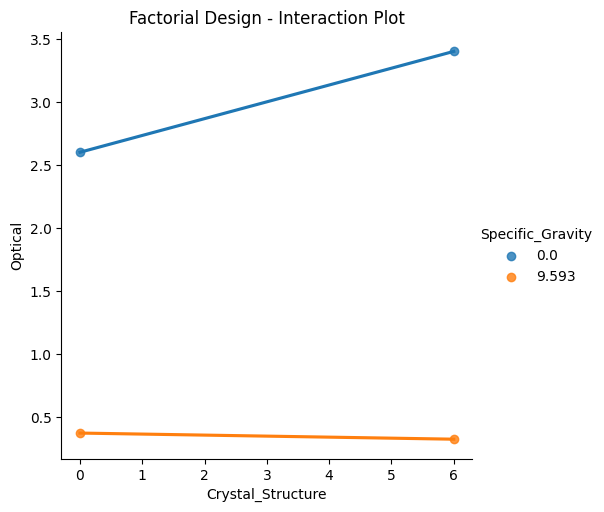

In [ ]:
# Visualization: Interaction Plot
sns.lmplot(data=design_df, x=factor_1, y=response_var, hue=factor_2, ci=None)
plt.title("Factorial Design - Interaction Plot")
plt.show()


Key Findings:

R-squared = 1.000
This means the model perfectly predicts the data, which is suspicious. It suggests overfitting due to a small dataset.

Adj. R-squared = NaN
This happens when the degrees of freedom for residuals (Df Residuals = 0) are zero, meaning there’s no remaining variability to estimate error.

Coefficients (coef column)
Intercept = 2.5997: This represents the predicted Optical Values when both Crystal_Structure and Specific_Gravity are at their baseline (low) levels.
Crystal_Structure = 0.1334: A unit increase in Crystal_Structure increases Optical Values by 0.1334.
Specific_Gravity = -0.2322: A unit increase in Specific_Gravity decreases Optical Values by 0.2322.
Interaction Term (Crystal_Structure:Specific_Gravity = -0.0147): This indicates how both factors together affect Optical Values. A negative value suggests a combined decreasing effect when both increase.

Standard Errors (std err = inf) and p-values (P>|t| = nan)
Infinite standard errors and NaN p-values suggest that the model does not have enough data to compute reliable statistics.




Problem:

-Too few observations (only 4 data points) for a regression with 3 factors.
Degrees of freedom for residuals = 0, making statistical inference impossible.

Solution:
Increase the number of observations
A factorial design with 2 factors at 2 levels should ideally have at least 2² × replications (e.g., 8+ observations).

- Reduce the number of factors if more data isn’t available

Try modeling with only one factor first, then add interactions gradually.

- Check if Crystal_Structure is categorical

If it’s a category (e.g., “Cubic” vs. “Hexagonal”), convert it using:
df["Crystal_Structure"], _ = pd.factorize(df["Crystal_Structure"])

